<a href="https://colab.research.google.com/gist/MurphLaws/c6246a5b145ee21df9af29c83ecbfd92/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP: Machine Learning (SIA_3611)

## TP1: Linear Regression (4h)

## Students:

### - Rayane Ghilene
### - Nicolas Lasso Jaramillo

by Clément Bouvier

Linear regression is a family of machine learning algorithms aiming at adjusting a linear model to an ensemble of data. The applications range from signal reconstruction to empirical description.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP1 is to manipulate this dataset and try to predict the evolution of Life Expectancy through different variables.

**Objectives:**
- Use and setup an iPython environment
- Manipulate and visualize data
- Implement a simple linear regression
- Apply the aforementioned linear regression
- Compute a $R^2$ on the generated results
- Apply Ridge and Lasso regressions


## STEP 1: Use and setup an iPython environment

iPython and Notebook environments are useful tools to quickly prototype and test machine learning solutions. However, they have limitations especially in RAM and disk access.

**TO DO 1.1**

Execute the following cells

In [2]:
a = 3
b = 4
c = a + b


In [3]:
c = c

In [4]:
print(c)

7


In [5]:
c

7

**QUESTION 1**

What is triggering the output display?


**Answer:**

The value of InteractiveShell.ast_node_interactivity establishes which nodes or operations within the notebook are executed interactively, the default value is "last_exp", but can be "all" or "none"

**TO DO 1.2**

Execute the following cells

In [6]:
import shutil
import pkgutil

def show_acceptable_modules():
    line = '-' * 100
    print('{}\n{:^30}|{:^20}\n{}'.format(line, 'Module', 'Location', line))
    for entry in pkgutil.iter_modules():
        print('{:30}| {}'.format(entry[1], entry[0].path))

In [7]:
show_acceptable_modules()

----------------------------------------------------------------------------------------------------
            Module            |      Location      
----------------------------------------------------------------------------------------------------
__future__                    | /home/codespace/.python/current/lib/python3.10
_aix_support                  | /home/codespace/.python/current/lib/python3.10
_bootsubprocess               | /home/codespace/.python/current/lib/python3.10
_collections_abc              | /home/codespace/.python/current/lib/python3.10
_compat_pickle                | /home/codespace/.python/current/lib/python3.10
_compression                  | /home/codespace/.python/current/lib/python3.10
_markupbase                   | /home/codespace/.python/current/lib/python3.10
_osx_support                  | /home/codespace/.python/current/lib/python3.10
_py_abc                       | /home/codespace/.python/current/lib/python3.10
_pydecimal                    | /ho

**QUESTION 2**

**What is displayed on the last output?**

The method defined lists and displays the available Python modules and their file locations in the current Python environment.

**Which is the used Python version?**

Python 3.10

For this TP1, you will need:
- pandas
- matplotlib
- numpy
- sklearn

**Are these packages installed in this environment?**

As we are working locally we missed sklearn and seaborn for visualization, but nothing a simple installing command cannot fix!

In [8]:
!pip3 install scikit-learn seaborn

**TO DO 1.3**

Execute the following cell

In [9]:
import pandas

pandas.__version__




'2.1.0'

**QUESTION 3**

How would you solve this error?

As we fixed it in the code, simply importing the required libraries should allow us to refer to them in to code cells.

## STEP 2: Data manipulation and visualization


**TO DO 2.1**

Execute the following cell

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/workspaces/Exp/data/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

**QUESTION 4**

Can you explain the different elements printed on the last output?

You can see the output of the info() command for a dataset from which the missing data was removed. We can see that it is a DataFrame from the pandas library, a data structure in which information is recorded as it would be in any data table. Specifically, we can see all the columns of said DF, the type of data stored in each column, the amount of non-null data, its size in KB, the indices of each record and the total count of these.

In [11]:
from IPython.display import display

df1 = df[(df.Country == "France") & (df.Year > 2010)]
print("df1: ", df1)
df2 = df[(df.Country == "France")].Year
print("df2: ", df2)


df1:      Country  Longitude  Latitude Continent  Year      Status  Life_expectancy  \
931  France  -2.761729  42.17344    Europe  2014  Developing             82.2   
932  France  -2.761729  42.17344    Europe  2013  Developing             82.0   
933  France  -2.761729  42.17344    Europe  2012  Developing             81.5   
934  France  -2.761729  42.17344    Europe  2011  Developing             81.7   

     Adult_mortality  Infant_deaths  Alcohol  ...  Polio  Total_expenditure  \
931             79.0              3     11.5  ...   98.0              11.54   
932             81.0              3     11.1  ...   99.0              11.56   
933             83.0              3     11.5  ...   99.0              11.44   
934             83.0              3     11.8  ...   99.0              11.33   

     Diphtheria  HIV_AIDS          GDP  Population  Thinness _1-19_years  \
931        98.0       0.1  42955.24287  66331957.0                   0.6   
932        99.0       0.1  42554.12250  

**QUESTION 5**

How do you interpret the new Data Frame df1 compared to df? What represents df2 compared to df1?

DataFrame df1 uses a boolean masking to access only those records whose value in the "Country" column matches the value "France", and whose value in the "Year" commune is greater than 2010.

The df2 dataframe uses the same method to access the records whose value also matches the country "France" but only return the "Year" value of each registry. This corresponds to a 1D array that, when extracted from a DF, is known as a series.


**TO CODE 2.2**

What is the range of life expectancy of Belgium between 2004 and 2008?

In [12]:
life_belgium_df = df[df.Country=="Belgium"].Life_expectancy
life_belgium_2004_2008 = life_belgium_df[(df.Year >= 2004) & (df.Year <= 2008)]

print("The range of life expectancy in Belgium is: ", life_belgium_2004_2008.min(), " - ", life_belgium_2004_2008.max())



The range of life expectancy in Belgium is:  78.8  -  79.5


**TO DO 2.3**

Compute the correlation among all features

In [13]:
df.corr(numeric_only=True)['Life_expectancy']#.sort_values(ascending=False)

Longitude                         -0.192675
Latitude                           0.432515
Year                               0.050771
Life_expectancy                    1.000000
Adult_mortality                   -0.702523
Infant_deaths                     -0.169074
Alcohol                            0.402718
Percentage_expenditure             0.409631
Hepatitis_B                        0.199935
Measles                           -0.068881
BMI                                0.542042
Under-five_deaths                 -0.192265
Polio                              0.327294
Total_expenditure                  0.174718
Diphtheria                         0.341331
HIV_AIDS                          -0.592236
GDP                                0.441322
Population                        -0.022305
Thinness _1-19_years              -0.457838
Thinness_5-9_years                -0.457508
Income_composition_of_resources    0.721083
Schooling                          0.727630
Name: Life_expectancy, dtype: fl

<Axes: >

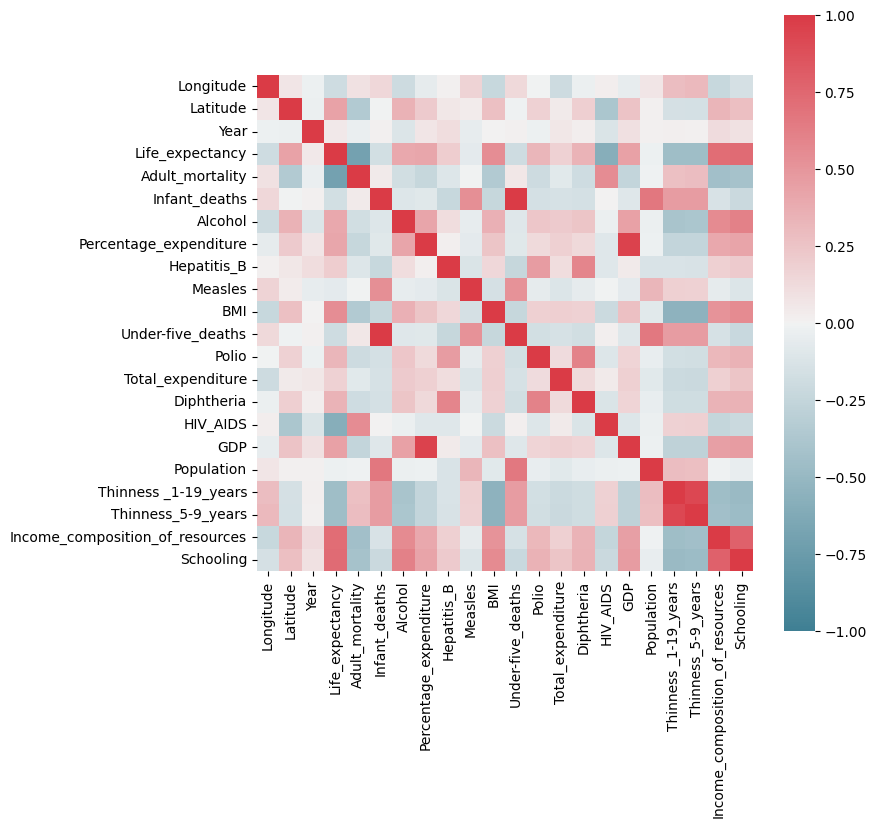

In [14]:
#We also want to plot a correlation matrix to see the correlation between all the variables.

import seaborn as sns

f, ax = plt.subplots(figsize=(8, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

**QUESTION 6**

Which seems the most and the least promising values to use as a predictor for life expectancy?

Regarding life expectancy, the most promising values are **Schooling**, **Income composition of resources** and, negatively,  **Adult Mortality**.

The function scatter of matplotlib allows to plot two values against each other. Here is the documentation about this function:

```
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
```
Parameters:

**x, y** float or array-like, shape (n, )

The data positions.

**s** float or array-like, shape (n, ), optional

The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.

**c** array-like or list of colors or color, optional

The marker colors. Possible values:

- A scalar or sequence of n numbers to be mapped to colors using cmap and norm.

- A 2D array in which the rows are RGB or RGBA.

- A sequence of colors of length n.

- A single color format string.

**marker** MarkerStyle, default: rcParams (default: 'o')

The marker style. marker can be either an instance of the class or the text shorthand for a particular marker. See matplotlib.markers for more information about marker styles.

**cmapstr** or Colormap, default: rcParams(default: 'viridis')

A Colormap instance or registered colormap name. cmap is only used if c is an array of floats.

**norm** Normalize, default: None

If c is an array of floats, norm is used to scale the color data, c, in the range 0 to 1, in order to map into the colormap cmap. If None, use the default colors.Normalize.

**vmin, vmax** float, default: None

vmin and vmax are used in conjunction with the default norm to map the color array c to the colormap cmap. If None, the respective min and max of the color array is used. It is deprecated to use vmin/vmax when norm is given.

**alpha** float, default: None

The alpha blending value, between 0 (transparent) and 1 (opaque).

**linewidths** float or array-like, default: rcParams (default: 1.5)

The linewidth of the marker edges. Note: The default edgecolors is 'face'. You may want to change this as well.

**edgecolors** {'face', 'none', None} or color or sequence of color, default: rcParams["scatter.edgecolors"] (default: 'face')

The edge color of the marker. Possible values:

- 'face': The edge color will always be the same as the face color.

- 'none': No patch boundary will be drawn.
        
- A color or sequence of colors.

For non-filled markers, edgecolors is ignored. Instead, the color is determined like with 'face', i.e. from c, colors, or facecolors.

**plotnonfinite** bool, default: False

Whether to plot points with nonfinite c (i.e. inf, -inf or nan). If True the points are drawn with the bad colormap color (see Colormap.set_bad).


**TO CODE 2.4**

Plot life expectancy against one of your chosen values.

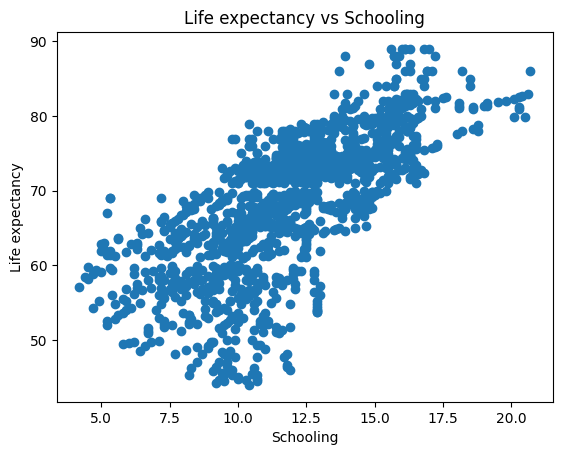

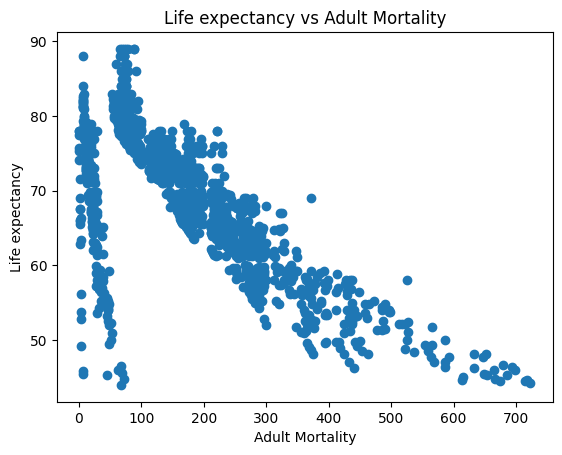

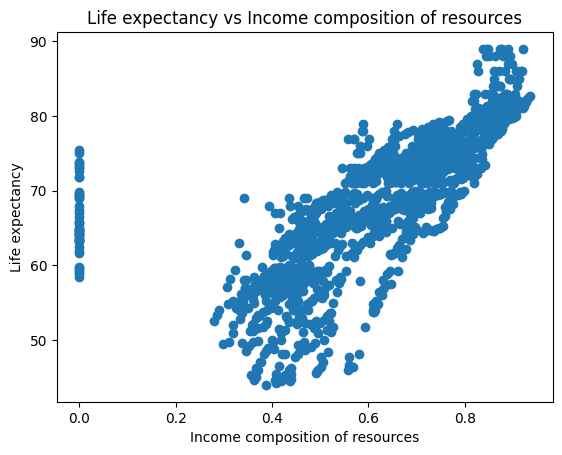

In [15]:

#Let's plot it against all three of them. 

import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df.Schooling,df.Life_expectancy)
plt.title("Life expectancy vs Schooling")
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.show()

plt.scatter(df.Adult_mortality,df.Life_expectancy)
plt.title("Life expectancy vs Adult Mortality")
plt.xlabel("Adult Mortality")
plt.ylabel("Life expectancy")
plt.show()

plt.scatter(df.Income_composition_of_resources,df.Life_expectancy)
plt.title("Life expectancy vs Income composition of resources")
plt.xlabel("Income composition of resources")
plt.ylabel("Life expectancy")
plt.show()


## STEP 3: Simple Linear Regression

In [16]:
import numpy as np

**TO CODE 3.1**

Select the Life Expectancy and the Income composition of resources of Belarus, Madagascar, India and Lithuania. This new Data Frame will be called df_study

In [17]:


df_study = df[(df.Country == "Madagascar") | (df.Country == "Belarus") | (df.Country == "India") | (df.Country == "Lithuania")][["Country","Income_composition_of_resources","Life_expectancy"]]
df_study.head(20)


,Country,Income_composition_of_resources,Life_expectancy
225,Belarus,0.796,72.0
226,Belarus,0.796,71.7
227,Belarus,0.793,71.9
228,Belarus,0.787,72.0
229,Belarus,0.780,73.0
230,Belarus,0.771,70.0
231,Belarus,0.755,70.0
232,Belarus,0.739,69.8
233,Belarus,0.723,68.9
234,Belarus,0.713,68.1


**TO CODE 3.2**

Implement a simple least square function and apply it on the previous selected data.



![least](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2023/03/least_squares_regression_line_formula2.png?resize=295%2C162&ssl=1)




In [18]:



def least_squares(df, x_data= "Income_composition_of_resources"):
    x = df[x_data]
    y = df.Life_expectancy
    N = len(x)

    m = (N*np.sum(x*y) - np.sum(x)*np.sum(y))/(N*np.sum(x**2) - np.sum(x)**2)
    b = (np.sum(y) - m*np.sum(x))/N

    return m, b


slope, intercept = least_squares(df_study)
print("Slope: ", slope)
print("Intercept: ", intercept)



Slope:  28.598226140676623
Intercept:  49.347635188332504


**TO CODE 3.3**

On the same figure, draw the line corresponding to your regression and the data points corresponding to df_study

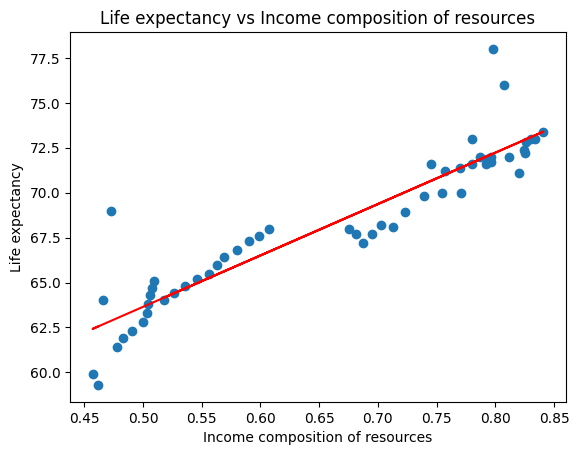

In [19]:

plt.scatter(df_study.Income_composition_of_resources,df_study.Life_expectancy)
plt.plot(df_study.Income_composition_of_resources, intercept + slope*df_study.Income_composition_of_resources, color='red') 
plt.title("Life expectancy vs Income composition of resources")
plt.xlabel("Income composition of resources")
plt.ylabel("Life expectancy")
plt.show()

**TO CODE 3.4**

Now, implement a Gradient Descend function `def gradDescent(x, y, theta, alpha, iters)` where `x` are
the covariates, `y` the target value, `theta` the initial weights, `alpha` the learning rate and `iters` the number
of gradient descent iterations. Your function should return all intermediary values of `theta` that has been computed as a list.



In [20]:


def gradDescent(x, y, theta , alpha, iters):
    m = len(y)
    thetaList = []
    for i in range(iters):
        theta = theta - alpha * (1/m) * np.dot(x.T, (np.dot(x, theta) - y))
        thetaList.append(theta)
    return thetaList





**TO CODE 3.5**

Compute the gradient descend on df_study for 1000 iterations with different values of `alpha`. You
may initialize `theta` with `theta_0 = 0` and `theta_1 = 1`

In [21]:


x = df_study.Income_composition_of_resources
y = df_study.Life_expectancy
x = np.c_[np.ones(x.shape[0]), x]

print("x shape:", x.shape)
print("x: ")
print(x[0:10])

theta = np.array([0, 1])
alpha = 0.01
iters = 1000

thetaList = gradDescent(x, y, theta, alpha, iters)


print("\nthetaList len:", len(thetaList))
print("thetaList: ")
thetaList[0:10]

x shape: (54, 2)
x: 
[[1.    0.796]
 [1.    0.796]
 [1.    0.793]
 [1.    0.787]
 [1.    0.78 ]
 [1.    0.771]
 [1.    0.755]
 [1.    0.739]
 [1.    0.723]
 [1.    0.713]]

thetaList len: 1000
thetaList: 


[array([0.67585463, 1.45148559]),
 array([1.34196715, 1.89645378]),
 array([1.99847804, 2.33499857]),
 array([2.64552577, 2.76721259]),
 array([3.28324681, 3.19318713]),
 array([3.91177566, 3.61301218]),
 array([4.53124488, 4.02677642]),
 array([5.14178511, 4.43456725]),
 array([5.74352513, 4.83647081]),
 array([6.33659183, 5.23257201])]

**TO CODE 3.6**

On the same figure, plot the evolution of theta_0 through the iterations for each different values of
alpha you chose. Do the same thing for theta_1.

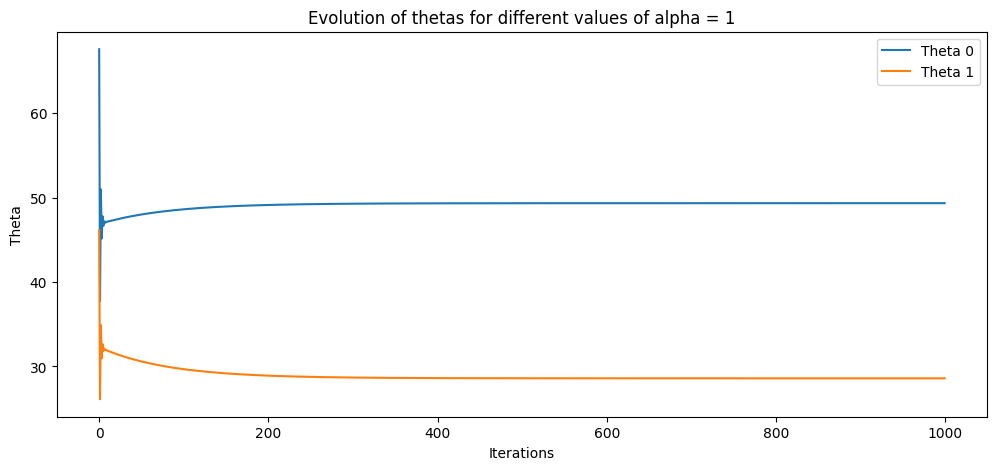

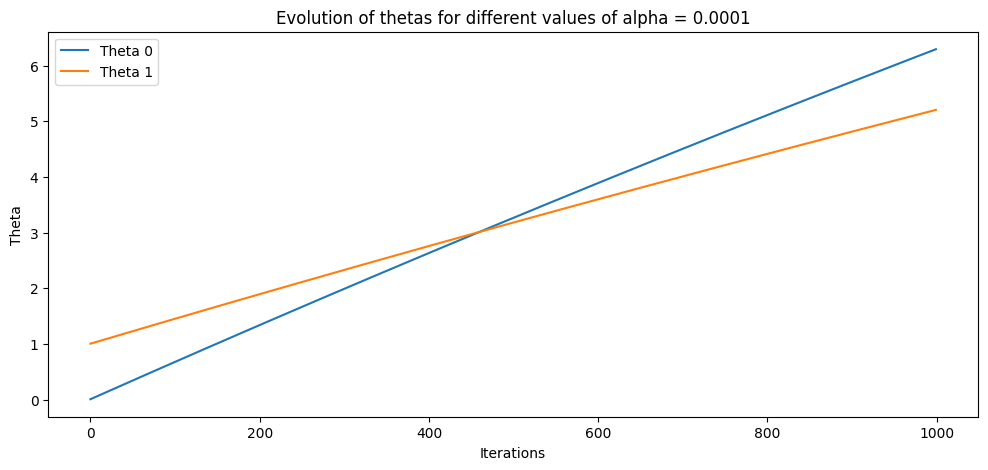

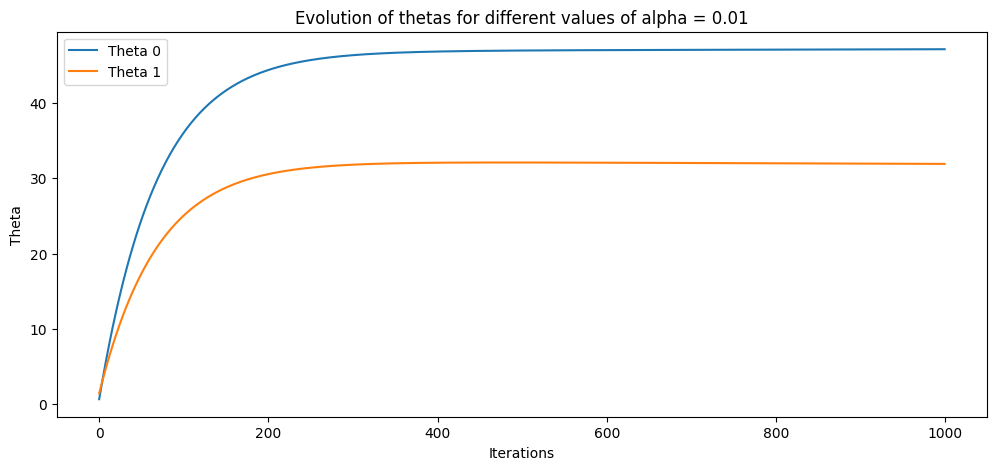

In [22]:

thetaList_00001 = gradDescent(x, y, theta, 0.0001, iters)
thetaList_001 = gradDescent(x, y, theta, 0.01, iters)
thetaList_1 = gradDescent(x, y, theta, 1, iters)



plt.figure(figsize=(12,5))
plt.plot(thetaList_1)
plt.title("Evolution of thetas for different values of alpha = 1")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.legend(["Theta 0", "Theta 1"])


plt.figure(figsize=(12,5))
plt.plot(thetaList_00001)
plt.title("Evolution of thetas for different values of alpha = 0.0001")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.legend(["Theta 0", "Theta 1"])


plt.figure(figsize=(12,5))
plt.plot(thetaList_001)
plt.title("Evolution of thetas for different values of alpha = 0.01")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.legend(["Theta 0", "Theta 1"])



**Question 7**

Discuss on the role of alpha

Alpha corresponds to the learning rate of our gradient descent algorithm. This value is important since it determines the convergence speed of our algorithm. If the value is very small, the algorithm will take a long time to converge, but if the value is very large, the algorithm may diverge. In our case, the value of alpha = 1 is too large and the algorithm diverges. The value of alpha = 0.0001 is too small and the algorithm takes a long time to converge. The value of alpha = 0.01 is the optimal value for our algorithm, since it converges quickly and does not diverge.

$R^2$ is the coefficient of determination useful to score a regression against the ground truth data.

This coefficient can be computed with a sklearn function:

```
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
```

With:

**y_true** array-like of shape (n_samples,) or (n_samples, n_outputs)

Ground truth (correct) target values.

**y_pred** array-like of shape (n_samples,) or (n_samples, n_outputs)

Estimated target values.

**sample_weight** array-like of shape (n_samples,), default=None

Sample weights.

**multioutput** {‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) or None, default=’uniform_average’

Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average”.

- ‘raw_values’: Returns a full set of scores in case of multioutput input.

- ‘uniform_average’: Scores of all outputs are averaged with uniform weight.

- ‘variance_weighted’: Scores of all outputs are averaged, weighted by the variances of each individual output.


In [23]:
from sklearn.metrics import r2_score

**TO CODE 3.7**

Compute $R^2$ on the regression with df_study

In [24]:

#We want to compute the R2 score for the last iteration of the gradient descent algorithm for each value of alpha.

intercept = thetaList_001[-1][0] #Intercept on the last iteration
slope = thetaList_001[-1][1] #Slope on the last iteration

x = df_study.Income_composition_of_resources

y_pred = intercept + slope*x


print("R2 score for alpha = 0.001: \n", r2_score(df_study.Life_expectancy, y_pred))


R2 score for alpha = 0.001: 
 0.8352402625981873


**QUESTION 8**

Is linear regression suited between the two selected variables?

There is no definitive threshold at which an R-squared value can be defined (without taking into account the perfect case of R-squared = 1), however many people consider an R-squared value >= 0.75 as a strong correlation and a value >= 0.9 as satisfactory. **In the case obtained of R-squared = 0.83 we consider that the linear regression performed does fit the data values.**

**QUESTION 9**

If not, what would be the relevant regression between these two variables?

We know that it is possible to get a slightly larger R-squared value with a few steps, so next we add an extra linear regression, fitted on the data in the "Adult_mortality" column.

### STEP 3.2: Simple Linear Regression with a negatively correlated variable (Extra)


The top 10 countries with the lowest minimum correlation between adult mortality and life expectancy are: 
 Country
Haiti                  -1.000000
Timor-Leste            -0.996906
Estonia                -0.993574
Namibia                -0.988014
Kenya                  -0.985667
Ukraine                -0.983619
Syrian Arab Republic   -0.978978
Serbia                 -0.973574
Sri Lanka              -0.965695
Sweden                 -0.952579
Name: Life_expectancy, dtype: float64 

Slope:  -0.06872847098101201
Intercept:  82.99839308001535


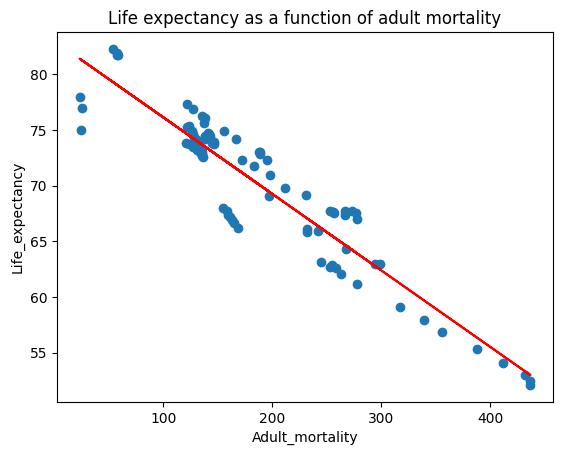

r2_score:  0.8711190208005362


In [25]:


# We define a df_study_2 dataframe with the data of the Adult mortality and Life expectancy columns

df_study_2 = df[["Adult_mortality","Life_expectancy"]]


# We use the groupby function to group the data by country and then we compute the correlation between the Adult mortality and Life expectancy columns for each country. 
# We then select the minimum correlation (Remember Adult_mortality presents a high magnitude negative correlation) for each country and we select the 10 countries
#  with the lowest minimum correlation.

correlations = df.groupby('Country')[['Adult_mortality', 'Life_expectancy']].corr().iloc[0::2, -1]
top_10_countries = correlations.groupby('Country').min().nsmallest(10)


print("The top 10 countries with the lowest minimum correlation between adult mortality and life expectancy are: \n", top_10_countries,"\n")




countries = top_10_countries.index.tolist()
df_study_2 = df[df.Country.isin(countries)][["Country","Adult_mortality","Life_expectancy"]]



#We call the least_squares function with the Adult_mortality column as the x_data parameter
slope, intercept = least_squares(df_study_2, x_data= "Adult_mortality")
print("Slope: ", slope)
print("Intercept: ", intercept)




plt.scatter(df_study_2.Adult_mortality,df_study_2.Life_expectancy)
plt.plot(df_study_2.Adult_mortality,  intercept + slope*df_study_2.Adult_mortality, color='red')
plt.xlabel("Adult_mortality")
plt.ylabel("Life_expectancy")
plt.title("Life expectancy as a function of adult mortality")
plt.show() 


#We compute the R2 score for the new linear regression model
x = df_study_2.Adult_mortality
y_pred = intercept + slope*x
print("r2_score: ", r2_score(df_study_2.Life_expectancy, y_pred))





### And with a few extra steps we increased the R2 score from 0.83 to a whopping 0.87!

<img src="https://i.kym-cdn.com/entries/icons/original/000/029/959/Screen_Shot_2019-06-05_at_1.26.32_PM.jpg" alt="Alt text" width="400">




## STEP 4: Multivariate regression

**TO DO 4.1**

Execute the following cells

In [26]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

df_study = df[(df.Country == "Belarus") | (df.Country == "Madagascar") | (df.Country == "India") | (df.Country == "Lithuania")]
y = df_study.Life_expectancy
X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]].to_numpy(dtype='float64')

alphas = 10**np.linspace(10,-2,100)*0.5



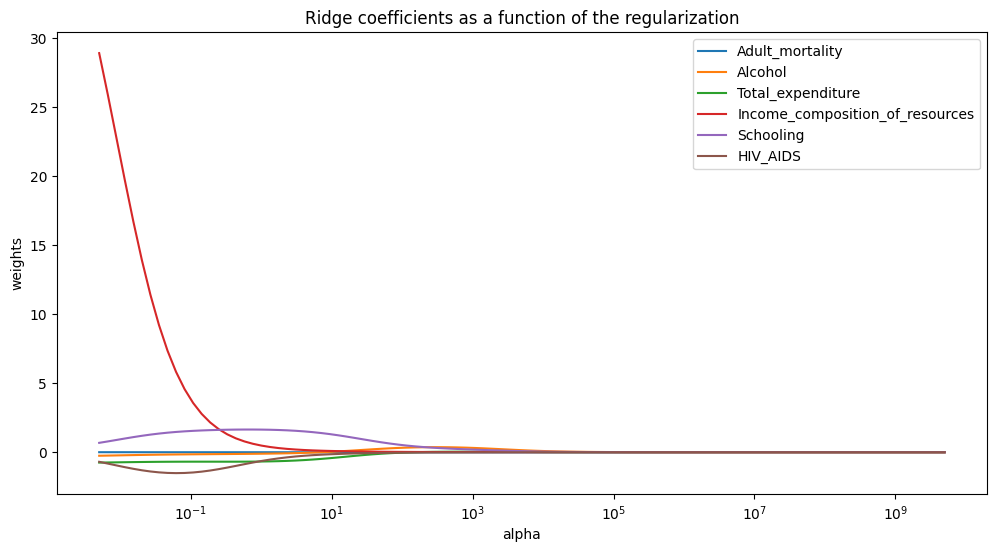

In [27]:
ridge = Ridge()
ridge_coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

plt.figure(figsize=(12,6))
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#We add a legend to the plot to know which line corresponds to each variable
plt.legend(['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"])
plt.title("Ridge coefficients as a function of the regularization")
plt.show()



**QUESTION 10**

How do you interpret the plot?

This plot corresponds to the value of the weights given to different features of our Ridge model by increasing the regularization factor alpha by several orders of magnitude.

**QUESTION 11**

Is it normal that the l2 diminishes with alpha increasing?

Of course! It's normal for the L2 regularization term to diminish with increasing alpha in regularized linear regression. As alpha increases, the model is encouraged to have smaller weigths, resulting in a simpler and more regularized mode

**QUESTION 12**

Which is the most relevant variable for Ridge? Prove and justify your response in the following cell

The most important feature for the Ridge model varies depending on the alpha, in an optimal case it would be the one we chose previously, "Income_composition_of_resources". However, when the regularization factor increases, the most relevant variable changes and focuses on variables that have lower means.

In the cell below we see the output of the describe() method of our DataFrame. We see that the average of the variables present in the graph in descending order are: Income, Schooling and Alcohol. And precisely in the plot below we also observe that these are the most important variables for the model in that same order due to the regularization factor.

This also explains why variables with a high correlation such as `Adult_mortality` are penalized, their mean is very high (173) and when regularization is applied the model never considers them.


,Schooling,Income_composition_of_resources,Adult_mortality,Alcohol,Schooling
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,12.940741,0.660833,173.666667,7.906481,12.940741
std,2.935117,0.133925,95.493356,6.005871,2.935117
min,8.300000,0.457000,2.000000,0.010000,8.300000
25%,10.200000,0.520000,63.250000,1.217500,10.200000
50%,13.750000,0.691000,218.000000,10.870000,13.750000
75%,15.675000,0.790750,247.000000,12.960000,15.675000
max,16.800000,0.841000,271.000000,17.310000,16.800000


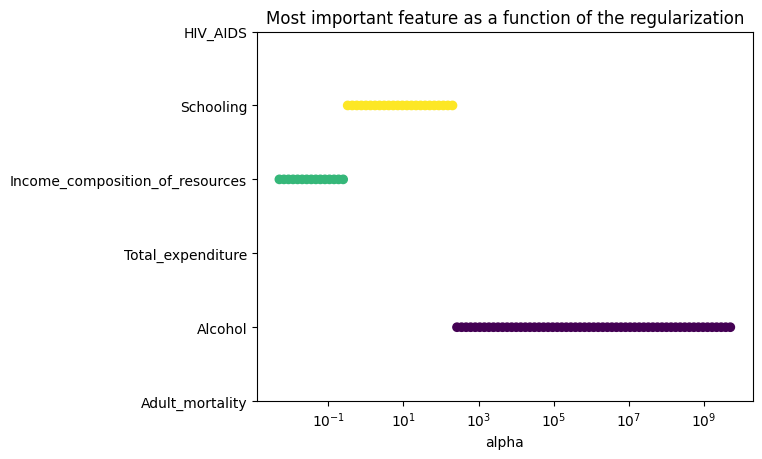

In [28]:


coefs_reversed = ridge_coefs[::-1]


indexes = []
for c in coefs_reversed:
    indexes.append(np.argmax(c)+1)

plt.scatter(alphas[::-1],indexes, c= indexes)
plt.yticks(range(1,7), ['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"])
plt.title("Most important feature as a function of the regularization")
plt.xscale('log')
plt.xlabel('alpha')


def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    thetaList = []
    for i in range(iters):
        theta = theta - alpha * (1/m) * np.dot(X.T, (np.dot(X, theta) - y))
        thetaList.append(theta)
    return thetaList
 


df_study[['Schooling', 'Income_composition_of_resources', 'Adult_mortality', 'Alcohol', 'Schooling']].describe()



**TO DO 4.2**

Execute the following cell

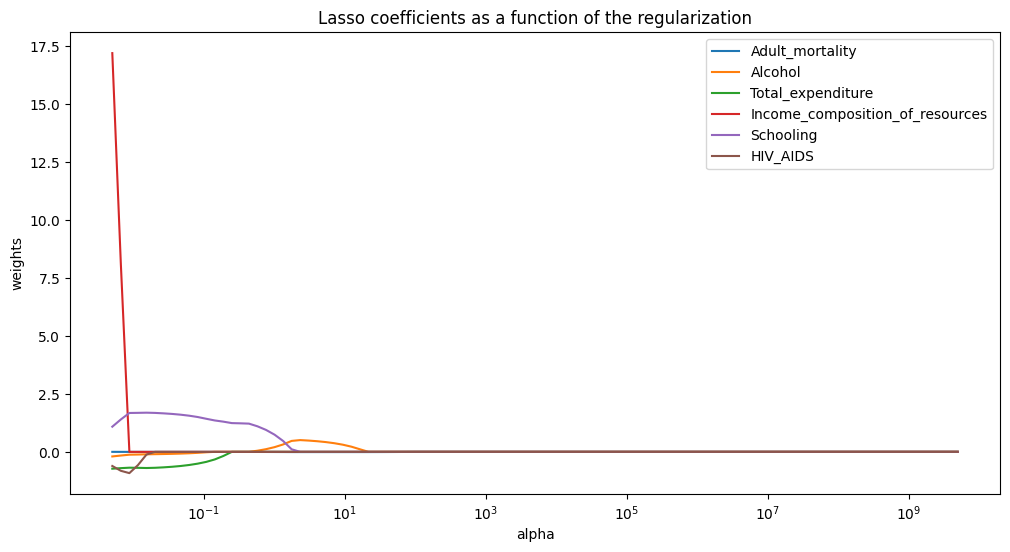

In [29]:
lasso = Lasso()
lasso_coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

plt.figure(figsize=(12,6))
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(["Adult_mortality", "Alcohol", "Total_expenditure", "Income_composition_of_resources", "Schooling", "HIV_AIDS"])
plt.title("Lasso coefficients as a function of the regularization")
plt.show()

**QUESTION 13**

Which is the most relevant variable for Lasso? Prove and justify your response in the following cell

As with Ridge regression, the Lasso method uses L1 regularization. Large values are also penalized and the same order is observed in the most important variable depending on the alpha value in the plot below. However, in this case the regularization is not so unforgiving with the high value of "Adult_mortality" and considers it as an important variable for the higher values of Alpha.

,Schooling,Income_composition_of_resources,Adult_mortality,Alcohol,Schooling
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,12.940741,0.660833,173.666667,7.906481,12.940741
std,2.935117,0.133925,95.493356,6.005871,2.935117
min,8.300000,0.457000,2.000000,0.010000,8.300000
25%,10.200000,0.520000,63.250000,1.217500,10.200000
50%,13.750000,0.691000,218.000000,10.870000,13.750000
75%,15.675000,0.790750,247.000000,12.960000,15.675000
max,16.800000,0.841000,271.000000,17.310000,16.800000


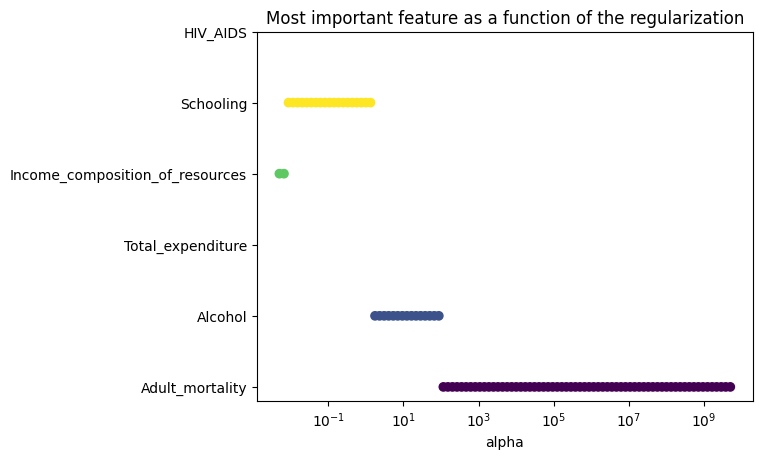

In [30]:


coefs_reversed = lasso_coefs[::-1]


indexes = []
for c in coefs_reversed:
    indexes.append(np.argmax(c)+1)

plt.scatter(alphas[::-1],indexes, c= indexes)
plt.yticks(range(1,7), ['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"])
plt.title("Most important feature as a function of the regularization")
plt.xscale('log')
plt.xlabel('alpha')


def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    thetaList = []
    for i in range(iters):
        theta = theta - alpha * (1/m) * np.dot(X.T, (np.dot(X, theta) - y))
        thetaList.append(theta)
    return thetaList
 


df_study[['Schooling', 'Income_composition_of_resources', 'Adult_mortality', 'Alcohol', 'Schooling']].describe()



**QUESTION 14**

What is the main difference between Ridge and Lasso regression? For this setup, which is the preferred method to use? Justify your response

The main difference between Ridge and Lasso regression is the penalty term. **Ridge regression uses L2 regularization**, which adds the squared sum of the coefficients, while **Lasso regression uses L1 regularization**, which adds the absolute sum of the coefficients to the loss function.

In our setup it is better to use Ridge regression, since we do not have many variables. Lasso regression is used because normally the absolute value term of the L1 regularization simply sets the unimportant features to zero. Ridge regression is best when multicollinearity is present, which is the case with some of the variables in this dataset.

** TO CODE 4.3 **

Following the previous examples, use a sklearn function to compute a multivariable least square method. Compare the coefficients obtained by the different methods.

The coefficients with the sklearn function are: 
 [ 2.65943031e-03 -3.17928713e-01 -7.99041602e-01  4.49600718e+01
  1.33103670e-01  1.25430166e-02]

The coefficients with the Ridge function are: 
 [ 1.46011347e-03 -2.55682188e-01 -7.51215943e-01  2.89080414e+01
  6.78771920e-01 -6.93865893e-01]

The coefficients with the Lasso function are: 
 [ 3.24223507e-04 -1.98162385e-01 -7.26797441e-01  1.72071998e+01
  1.08608875e+00 -6.09500518e-01]


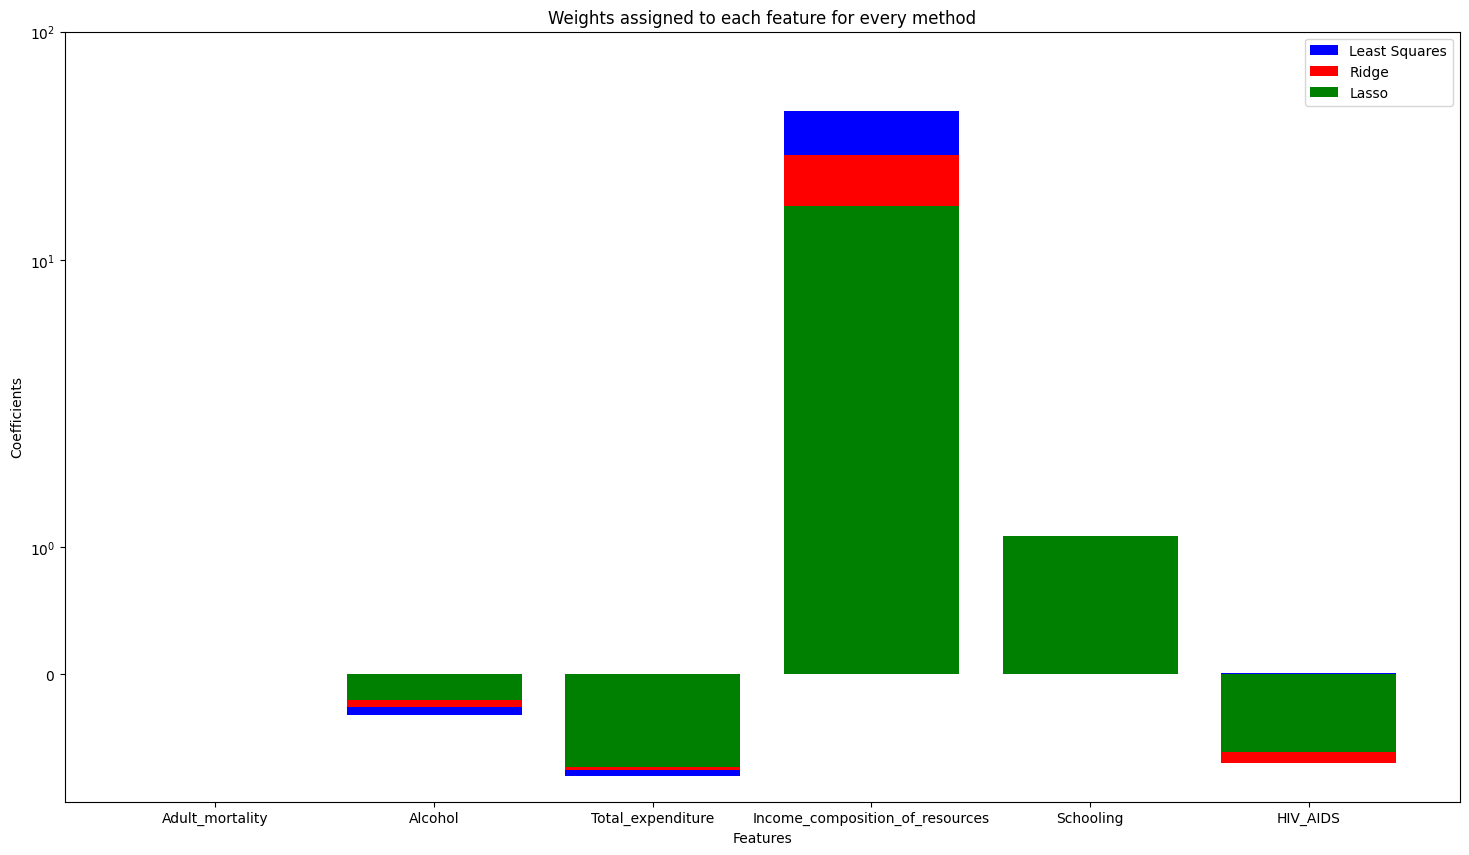

In [31]:
#Use a sklearn function 

from sklearn.linear_model import LinearRegression

X = df_study[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]]
y = df_study.Life_expectancy

reg = LinearRegression().fit(X, y)

print("The coefficients with the sklearn function are: \n", reg.coef_)
print("\nThe coefficients with the Ridge function are: \n", ridge.coef_)
print("\nThe coefficients with the Lasso function are: \n", lasso.coef_)



plt.figure(figsize=(18,10))
plt.bar(range(len(reg.coef_)), reg.coef_, color='blue')
plt.bar(range(len(ridge.coef_)),ridge.coef_, color='red')
plt.bar(range(len(lasso.coef_)),lasso.coef_, color='green')
plt.xticks(range(len(reg.coef_)), ['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"])
plt.yscale('symlog')
plt.ylim(-1,100)
plt.legend(["Least Squares", "Ridge", "Lasso"])
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Weights assigned to each feature for every method")
plt.show()


It can be seen how variables with a low mean such as Income, `mean = 0.6`, receive very high coefficients by all methods, and variables with a high mean such as Adult Mortality, `mean=173`, receive coefficients so low that they cannot be seen in the previous plot.

**TO CODE 4.4 **

Dealing with too many variables can sometimes be counter-productive and it can be more interesting to remove some features. One way to evaluate the importance of each variable is to compute the f_test whose function is named f_regression in sklearn.

In [55]:


from sklearn.feature_selection import f_regression

X = df[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS"]]
y = df.Life_expectancy

f_test = f_regression(X, y)


for feature in range(len(X.columns)):
    print("F-test for", X.columns[feature], ":", f_test[0][feature])
    print("p-value for", X.columns[feature], ":", f_test[1][feature], "\n")




F-test for Adult_mortality : 1604.9757134357128
F-test for Alcohol : 318.8208485794858
F-test for Total_expenditure : 51.85982649168011
F-test for Income_composition_of_resources : 1783.9648425644798
F-test for Schooling : 1853.1256470187866
F-test for HIV_AIDS : 889.7490778291371


**QUESTION 15**

According to the f_test, rank each variable from the least to the most promising. Compare it with the correlation of your subset.

In [65]:

X = df[['Adult_mortality', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'Schooling', "HIV_AIDS", "Life_expectancy"]]
corr = X.corr().sort_values(by='Life_expectancy', ascending=False).drop('Life_expectancy', axis=0)


print("The correlation of all the variables in X with the life expectancy column is: \n", corr.Life_expectancy, "\n")


feature_f_test = []
for feature in range(len(X.columns)-1):
    feature_f_test.append((X.columns[feature], f_test[0][feature], f_test[1][feature]))


feature_f_test.sort(key=lambda x: x[1], reverse=True)

for feature in feature_f_test:
    print("F-test for", feature[0], ":", feature[1])

 



The correlation of all the variables in X with the life expectancy column is: 
 Schooling                          0.727630
Income_composition_of_resources    0.721083
Alcohol                            0.402718
Total_expenditure                  0.174718
HIV_AIDS                          -0.592236
Adult_mortality                   -0.702523
Name: Life_expectancy, dtype: float64 

F-test for Schooling : 1853.1256470187866
F-test for Income_composition_of_resources : 1783.9648425644798
F-test for Adult_mortality : 1604.9757134357128
F-test for HIV_AIDS : 889.7490778291371
F-test for Alcohol : 318.8208485794858
F-test for Total_expenditure : 51.85982649168011


When dealing with this subset of the data, we can see a difference in the ranking of correlation and f-test.
The f-test ranks the features in the following order:
1. Schooling
2. Income composition of resources
3. HIV/AIDS
4. Adult mortality
5. Alcohol

The correlation ranks the features in the following order:
1. Schooling
2. Income composition of resources
3. Adult mortality
4. Alcohol
5. HIV/AIDS

The f-test ranks HIV/AIDS as the third most important feature, while the correlation ranks it as the fifth most important feature. 
This is because the f-test takes into account the correlation between the feature and the target variable, but also the correlation 
between the feature and the other features. In this case, HIV/AIDS has a high correlation with the target variable, but also a high 
correlation with the other features, which makes it less important than the other features.